# Ashkan Ganj 
### 9721973137
### Decision tree on life expectancy Dataset

## Import essential libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read CSV file with read_csv function of pandas

In [2]:
df = pd.read_csv('./Life Expectancy Data.csv')

show Some of our data

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Show some important variables of dataset

In [4]:
print("Min: ",df['Life expectancy '].min())
print("Max: ",df['Life expectancy '].max())
mean = df['Life expectancy '].mean()
median = df['Life expectancy '].median()
print("Mean: ", mean)
print("Median: ", median)

Min:  36.3
Max:  89.0
Mean:  69.22493169398912
Median:  72.1


In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Remove rows with missed values because of the importance of all features I can't set 0 for missed values so the best way is deleting them

In [6]:
df.dropna(how='any', inplace=True)

Country name is not important because we have other features that reperesent each country

I change the Developing to 1 and Develped to 0 for removing Strings

In [7]:
df.drop(columns='Country', inplace=True)
df.Status = df.Status.map({'Developing': 1, 'Developed': 0})

Adding a new categorical feature for sake of classification because my dataset type is regression

In [8]:
df['Life expectancy status'] = pd.cut(df['Life expectancy '], 
                               bins=[df['Life expectancy '].min(), median, df['Life expectancy '].max()], 
                               labels=['Bad', 'Good'])
df['Life expectancy status'] = df['Life expectancy status'].map({'Bad': -1, 'Good': 1})

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy status
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,-1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,-1
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,-1
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,-1
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,-1
2934,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,-1
2935,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,-1
2936,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,-1


In order to remove the impact of Life expectancy and do our classification based on our label we should remove the old feature.

In [11]:
df.drop('Life expectancy ', axis = 1, inplace=True)

splite our dataset to testset and train set

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop('Life expectancy status', axis = 1)
y = df['Life expectancy status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Making an object and train the model

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

evaluating the score with test set

In [14]:

model.score(x_test,y_test)

0.898989898989899

Show the importance of each feature for model

In [15]:
model.feature_importances_

array([0.02090823, 0.        , 0.50332551, 0.        , 0.03102545,
       0.00342624, 0.0023193 , 0.        , 0.030252  , 0.00666798,
       0.00513814, 0.0149914 , 0.04109242, 0.00686893, 0.01355562,
       0.01914955, 0.00434869, 0.01860169, 0.24358786, 0.03474101])

draw the confusion matrix

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       268
           1       0.90      0.88      0.89       227

    accuracy                           0.90       495
   macro avg       0.90      0.90      0.90       495
weighted avg       0.90      0.90      0.90       495

[[245  23]
 [ 27 200]]


draw the graph of DT

In [17]:
feature_names = x.columns

In [18]:
import graphviz
from sklearn import tree

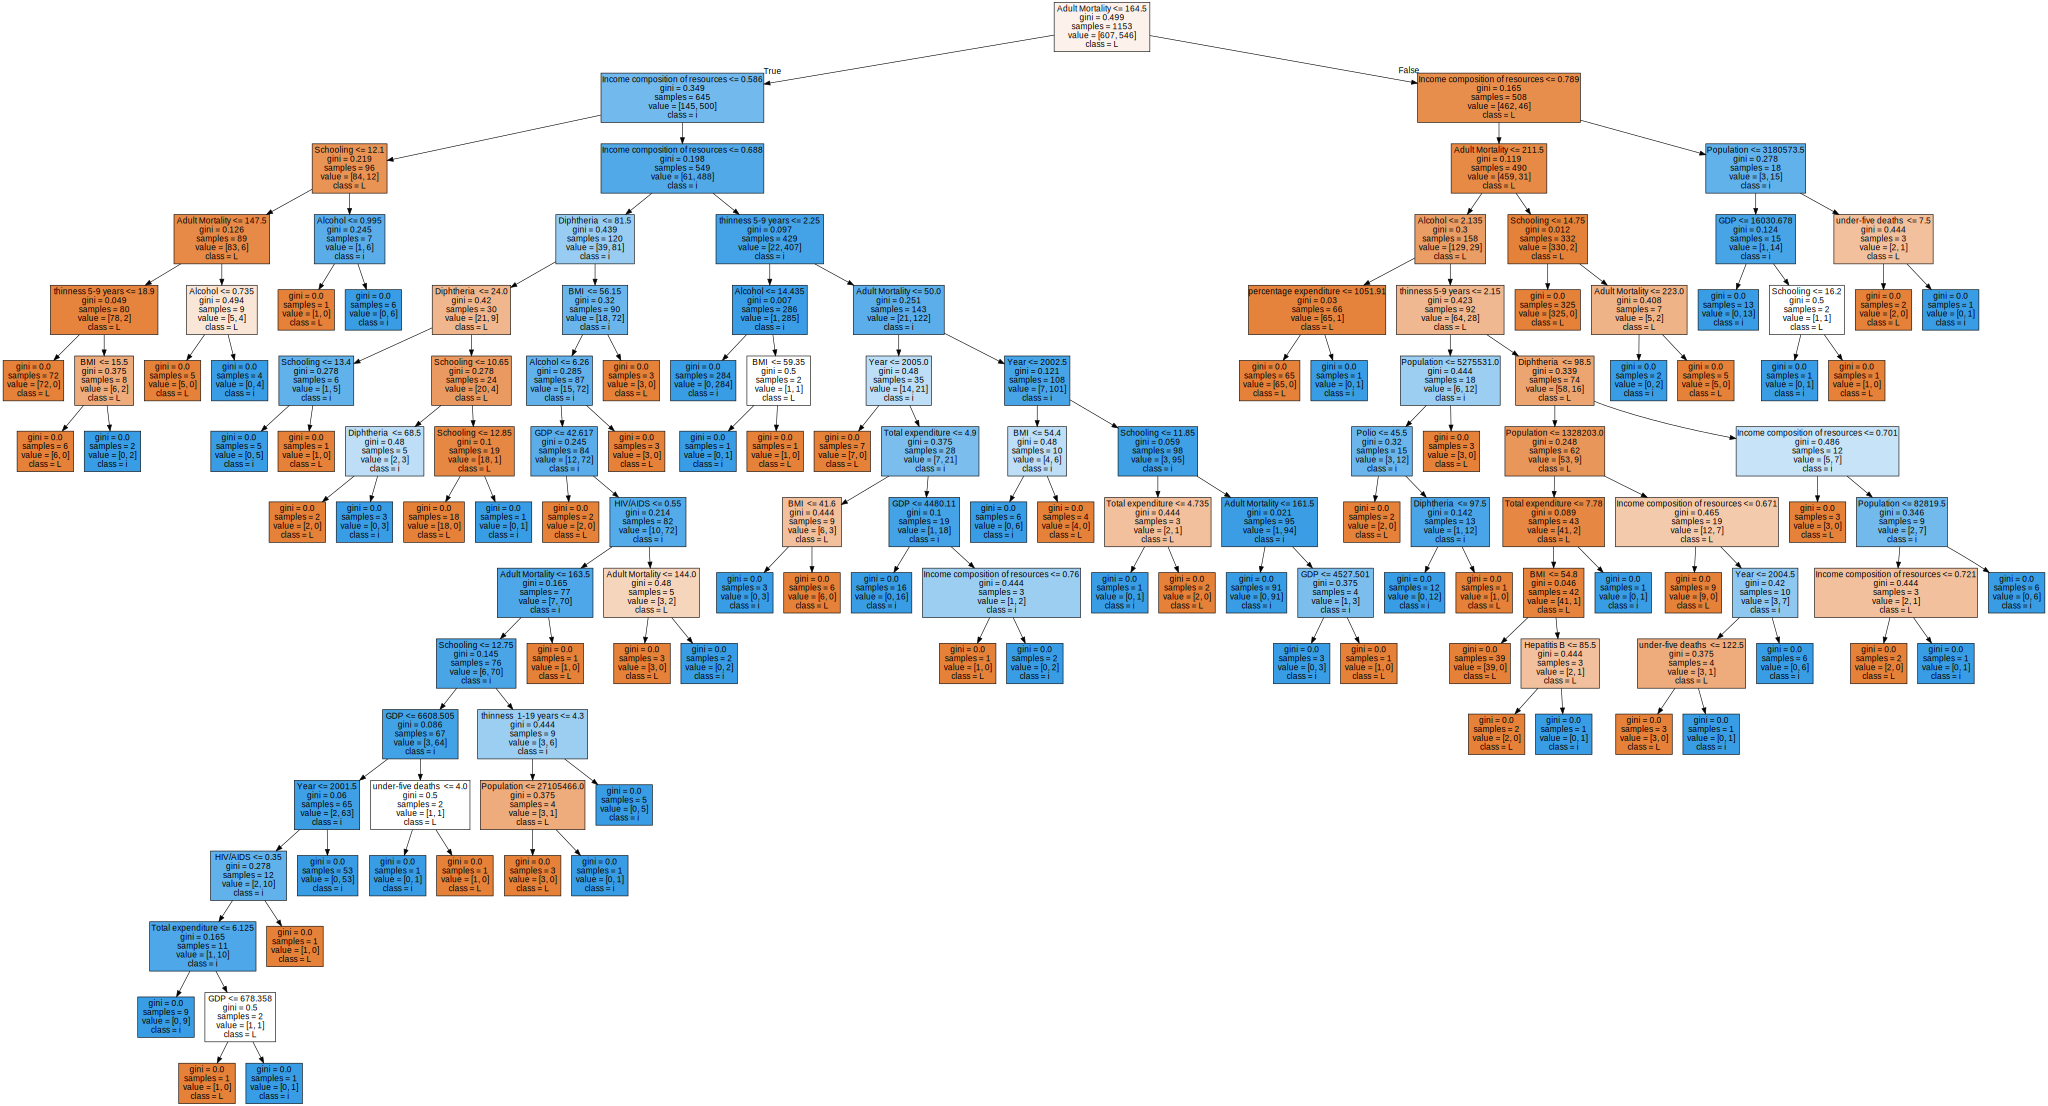

In [19]:
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,
                                class_names='Life expectancy status',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Save the graph as a png

In [20]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'